In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, IsolationForest, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import OneClassSVM, SVC
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score


In [ ]:
df = pd.read_csv("/content/FinData.csv")

In [ ]:
# Check data has loaded
df  # To ensure the data has loaded correctly.

,Unnamed: 0,Data,XAU BGNL,ECSURPUS,BDIY,CRY,DXY,JPY,GBP,Cl1,...,LP01TREU,EMUSTRUU,LF94TRUU,MXUS,MXEU,MXJP,MXBR,MXRU,MXIN,MXCN
0,0,1/11/2000,283.25,0.077,1388.0,157.2600,100.560,105.86,1.6460,25.77,...,116.4640,230.527,123.7620,1416.12,127.75,990.59,856.76,224.33,217.34,34.30
1,0,1/18/2000,287.65,0.043,1405.0,165.0100,101.860,105.47,1.6380,28.85,...,117.2670,231.377,123.7620,1428.79,129.50,993.98,925.22,234.37,227.08,32.74
2,0,1/25/2000,287.15,0.135,1368.0,167.2400,102.410,106.04,1.6500,28.28,...,117.9950,232.390,123.7620,1385.93,126.48,974.83,886.93,216.82,233.00,32.46
3,0,2/1/2000,282.75,0.191,1311.0,166.8500,104.920,107.85,1.6110,28.22,...,120.5100,231.942,122.3280,1385.31,129.19,1007.12,842.60,201.89,237.48,31.29
4,1,2/8/2000,298.40,0.312,1277.0,165.4300,104.220,109.30,1.6110,28.02,...,118.7910,237.812,122.3280,1411.95,134.67,1034.58,945.15,218.00,258.02,31.32
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1106,0,3/23/2021,1727.96,0.339,2271.0,184.5022,92.336,108.72,1.3760,57.76,...,427.7972,1249.403,389.8500,3800.77,140.32,1199.57,1671.73,681.21,1695.96,110.83
1107,0,3/30/2021,1685.56,0.303,2103.0,184.8741,93.297,110.29,1.3719,60.55,...,428.6578,1242.264,385.8145,3835.96,142.76,1206.29,1635.57,693.38,1690.76,108.80
1108,0,4/6/2021,1743.28,0.440,2092.0,185.8393,92.335,109.88,1.3822,59.33,...,430.6649,1250.256,390.6819,3955.16,144.13,1194.62,1689.62,673.20,1689.48,111.92
1109,0,4/13/2021,1742.69,0.467,2140.0,188.1368,91.852,109.19,1.3737,60.18,...,430.4087,1252.563,390.3848,4027.05,144.23,1197.06,1680.82,680.23,1672.46,108.40


In [ ]:
# Identify types and missing values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1111 entries, 0 to 1110
Data columns (total 44 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  1111 non-null   int64  
 1   Data        1111 non-null   object 
 2   XAU BGNL    1111 non-null   float64
 3   ECSURPUS    1111 non-null   float64
 4   BDIY        1111 non-null   float64
 5   CRY         1111 non-null   float64
 6   DXY         1111 non-null   float64
 7   JPY         1111 non-null   float64
 8   GBP         1111 non-null   float64
 9   Cl1         1111 non-null   float64
 10  VIX         1111 non-null   float64
 11  USGG30YR    1111 non-null   float64
 12  GT10        1111 non-null   float64
 13  USGG2YR     1111 non-null   float64
 14  USGG3M      1111 non-null   float64
 15  US0001M     1111 non-null   float64
 16  GTDEM30Y    1111 non-null   float64
 17  GTDEM10Y    1111 non-null   float64
 18  GTDEM2Y     1111 non-null   float64
 19  EONIA       1111 non-null  

In [ ]:
# Sample Values
df.head()

,Unnamed: 0,Data,XAU BGNL,ECSURPUS,BDIY,CRY,DXY,JPY,GBP,Cl1,...,LP01TREU,EMUSTRUU,LF94TRUU,MXUS,MXEU,MXJP,MXBR,MXRU,MXIN,MXCN
0,0,1/11/2000,283.25,0.077,1388.0,157.26,100.56,105.86,1.646,25.77,...,116.464,230.527,123.762,1416.12,127.75,990.59,856.76,224.33,217.34,34.30
1,0,1/18/2000,287.65,0.043,1405.0,165.01,101.86,105.47,1.638,28.85,...,117.267,231.377,123.762,1428.79,129.50,993.98,925.22,234.37,227.08,32.74
2,0,1/25/2000,287.15,0.135,1368.0,167.24,102.41,106.04,1.650,28.28,...,117.995,232.390,123.762,1385.93,126.48,974.83,886.93,216.82,233.00,32.46
3,0,2/1/2000,282.75,0.191,1311.0,166.85,104.92,107.85,1.611,28.22,...,120.510,231.942,122.328,1385.31,129.19,1007.12,842.60,201.89,237.48,31.29
4,1,2/8/2000,298.40,0.312,1277.0,165.43,104.22,109.30,1.611,28.02,...,118.791,237.812,122.328,1411.95,134.67,1034.58,945.15,218.00,258.02,31.32


In [ ]:
# Summary stats
df.describe()

,Unnamed: 0,XAU BGNL,ECSURPUS,BDIY,CRY,DXY,JPY,GBP,Cl1,VIX,...,LP01TREU,EMUSTRUU,LF94TRUU,MXUS,MXEU,MXJP,MXBR,MXRU,MXIN,MXCN
count,1111.000000,1111.000000,1111.000000,1111.000000,1111.000000,1111.000000,1111.000000,1111.000000,1111.000000,1111.000000,...,1111.000000,1111.000000,1111.000000,1111.000000,1111.000000,1111.000000,1111.000000,1111.000000,1111.000000,1111.000000
mean,0.213321,987.463744,0.036153,2259.860486,245.247670,90.934982,106.605734,1.569661,60.708101,19.992169,...,232.109985,704.379545,259.052717,1606.997102,107.877138,784.846292,1903.216436,648.681377,693.156616,53.933159
std,0.409837,494.623740,0.349453,2017.811888,68.278066,11.379095,12.840754,0.212344,25.900813,8.642157,...,109.917628,309.951757,75.934451,698.481956,20.795973,200.076443,986.468254,299.096020,405.527014,24.738356
min,0.000000,256.680000,-0.974000,291.000000,106.293000,71.329000,75.940000,1.172000,10.010000,9.430000,...,80.797000,230.527000,121.331000,663.690000,56.300000,431.710000,280.500000,151.250000,112.600000,13.460000
25%,0.000000,433.740000,-0.191000,990.000000,184.705550,81.240500,101.565000,1.418000,39.625000,13.640000,...,131.025000,434.661000,205.315500,1103.925000,90.605000,601.615000,1042.645000,463.195000,278.385000,28.565000
50%,0.000000,1137.800000,0.035000,1518.000000,234.560000,89.716000,108.720000,1.562000,57.400000,17.980000,...,213.205000,714.807000,264.770000,1324.430000,111.320000,786.830000,1860.960000,612.930000,691.530000,58.740000
75%,0.000000,1324.825000,0.260500,2685.500000,301.539500,97.404000,116.220000,1.677500,79.640000,23.625000,...,342.884500,939.824500,320.753000,1992.445000,126.470000,965.875000,2533.770000,793.620000,1014.750000,68.460000
max,1.000000,2006.910000,0.991000,11793.000000,467.570000,119.820000,134.630000,2.085000,140.970000,75.910000,...,431.552800,1286.353000,398.706500,4043.690000,146.390000,1210.580000,4721.360000,1617.640000,1730.510000,129.200000


In [ ]:
# Find missing data for preprocessing
df.isnull().sum()

,0
Unnamed: 0,0
Data,0
XAU BGNL,0
ECSURPUS,0
BDIY,0
CRY,0
DXY,0
JPY,0
GBP,0
Cl1,0


In [ ]:
# Summarize normal days
df[df['Y'] == 0].describe()
# Summarize crashes
df[df['Y'] == 1].describe()

# Identify correlations
numeric_df = df.select_dtypes(include=[np.number])
numeric_df.corr()

,Y,XAU BGNL,ECSURPUS,BDIY,CRY,DXY,JPY,GBP,Cl1,VIX,...,LP01TREU,EMUSTRUU,LF94TRUU,MXUS,MXEU,MXJP,MXBR,MXRU,MXIN,MXCN
Y,1.000000,-0.011535,-0.090772,-0.083440,-0.074102,0.103227,-0.151197,-0.093201,-0.070141,0.598432,...,-0.209774,-0.169475,-0.156550,-0.193928,-0.253877,-0.279399,-0.043429,-0.148848,-0.188942,-0.149581
XAU BGNL,-0.011535,1.000000,0.114798,-0.315007,0.015316,-0.428891,-0.576191,-0.422084,0.515215,-0.075873,...,0.817990,0.891486,0.925465,0.625814,0.176177,0.036654,0.581667,0.339929,0.831756,0.829659
ECSURPUS,-0.090772,0.114798,1.000000,-0.102022,-0.139779,0.074835,-0.070422,-0.188233,-0.016245,-0.094127,...,0.115747,0.110335,0.073268,0.192180,0.014535,0.034829,-0.014098,-0.077750,0.102198,0.115145
BDIY,-0.083440,-0.315007,-0.102022,1.000000,0.596182,-0.441793,0.062822,0.756718,0.286396,-0.045367,...,-0.410941,-0.350372,-0.241704,-0.300277,-0.058349,0.103124,0.337489,0.606526,-0.240799,-0.033084
CRY,-0.074102,0.015316,-0.139779,0.596182,1.000000,-0.798564,-0.412364,0.793954,0.785614,-0.190060,...,-0.315491,-0.218547,-0.045101,-0.458623,-0.261605,-0.235202,0.641511,0.761661,-0.210901,-0.031605
DXY,0.103227,-0.428891,0.074835,-0.441793,-0.798564,1.000000,0.650429,-0.544966,-0.816378,0.115712,...,-0.074069,-0.201703,-0.386866,0.144988,0.300674,0.247446,-0.776353,-0.756141,-0.188670,-0.352379
JPY,-0.151197,-0.576191,-0.070422,0.062822,-0.412364,0.650429,1.000000,-0.008633,-0.608209,-0.134791,...,-0.113902,-0.225936,-0.330176,0.115772,0.392934,0.557078,-0.639573,-0.306819,-0.149469,-0.269353
GBP,-0.093201,-0.422084,-0.188233,0.756718,0.793954,-0.544966,-0.008633,1.000000,0.352787,-0.124496,...,-0.598572,-0.549016,-0.402361,-0.594595,-0.246342,-0.113736,0.224720,0.530964,-0.501925,-0.329350
Cl1,-0.070141,0.515215,-0.016245,0.286396,0.785614,-0.816378,-0.608209,0.352787,1.000000,-0.213999,...,0.196312,0.292426,0.438823,-0.029697,-0.062125,-0.160278,0.861036,0.759998,0.284056,0.430908
VIX,0.598432,-0.075873,-0.094127,-0.045367,-0.190060,0.115712,-0.134791,-0.124496,-0.213999,1.000000,...,-0.310635,-0.253247,-0.227376,-0.239029,-0.421996,-0.367709,-0.098962,-0.247953,-0.243126,-0.164591


In [ ]:
correlations = numeric_df.corr()['Y'].sort_values(ascending=False)
print("Top feature correlations with crash")
print(correlations)

Top feature correlations with crash
Y            1.000000
VIX          0.598432
GTITL2YR     0.304528
GTITL10YR    0.297573
GTITL30YR    0.295000
EONIA        0.180311
GTDEM30Y     0.141537
GTDEM10Y     0.139933
GTJPY10YR    0.133660
GTDEM2Y      0.130607
GTJPY30YR    0.114555
GTJPY2YR     0.112314
DXY          0.103227
GTGBP20Y     0.100142
GTGBP30Y     0.099777
GTGBP2Y      0.035010
USGG30YR     0.019255
US0001M      0.015379
GT10        -0.004776
XAU BGNL    -0.011535
USGG3M      -0.025935
USGG2YR     -0.034909
MXBR        -0.043429
Cl1         -0.070141
CRY         -0.074102
BDIY        -0.083440
ECSURPUS    -0.090772
GBP         -0.093201
LUMSTRUU    -0.104897
LMBITR      -0.143607
MXRU        -0.148848
MXCN        -0.149581
JPY         -0.151197
LUACTRUU    -0.153544
LF94TRUU    -0.156550
EMUSTRUU    -0.169475
MXIN        -0.188942
LF98TRUU    -0.189661
MXUS        -0.193928
LG30TRUU    -0.197232
LP01TREU    -0.209774
MXEU        -0.253877
MXJP        -0.279399
Name: Y, dtype: fl

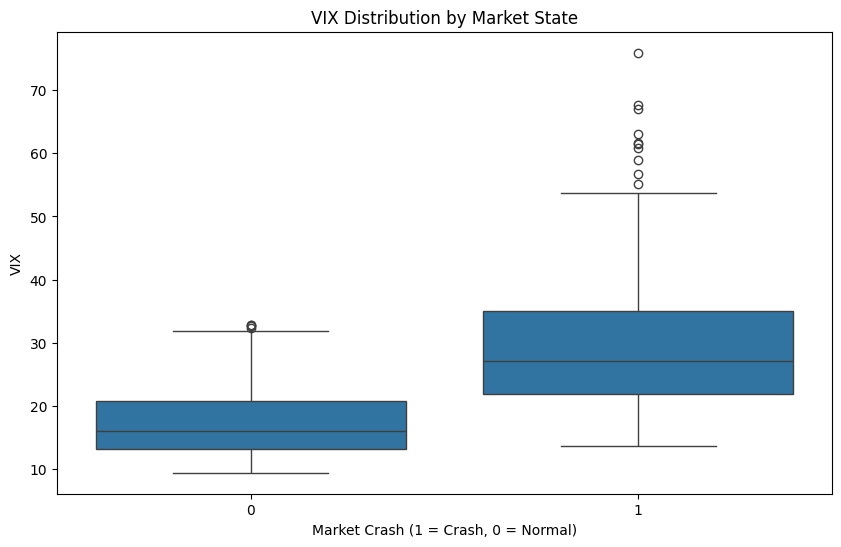

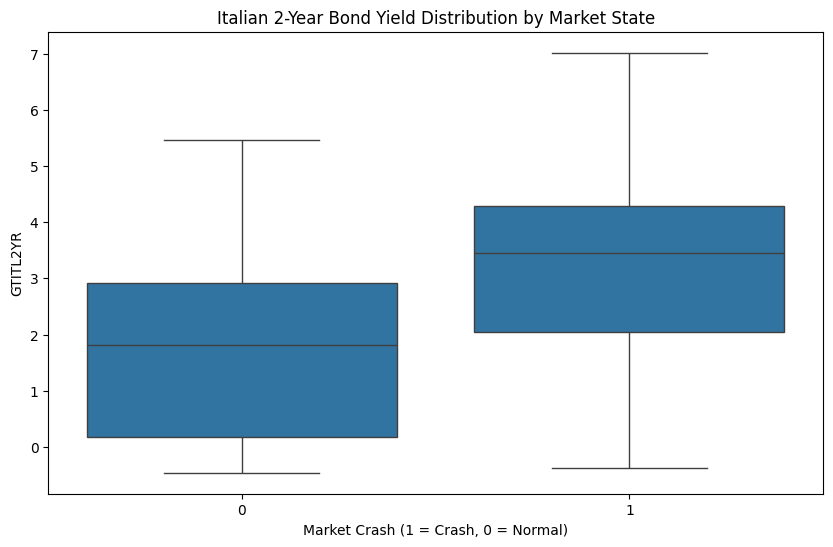

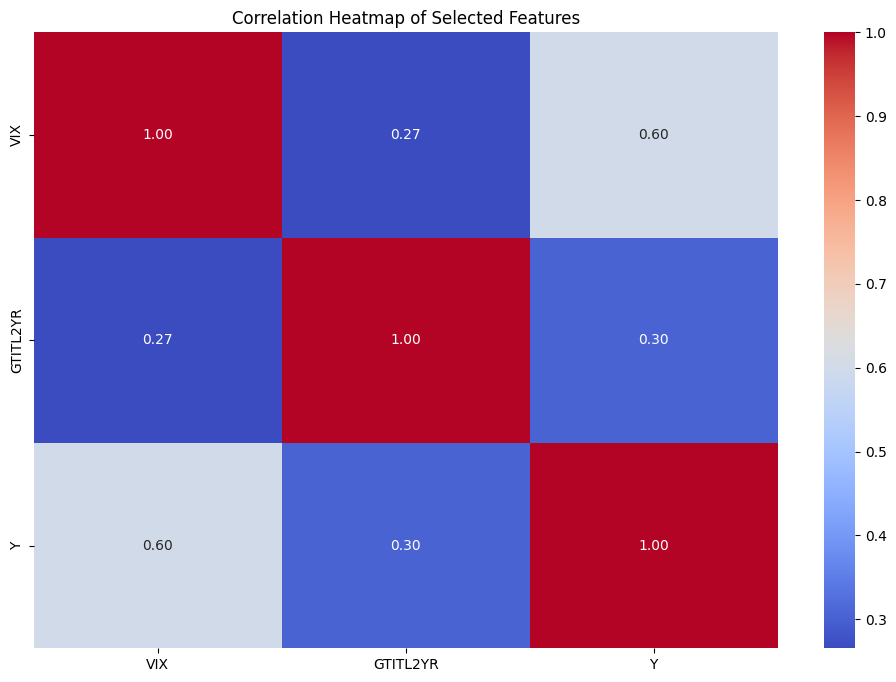

In [ ]:
# Visualize relationships between key features and market crashes
plt.figure(figsize=(10, 6))

# Plot 1: VIX vs Y
sns.boxplot(x='Y', y='VIX', data=df)
plt.title('VIX Distribution by Market State')
plt.xlabel('Market Crash (1 = Crash, 0 = Normal)')
plt.ylabel('VIX')
plt.show()

# Plot 2: GTITL2YR vs Y
plt.figure(figsize=(10, 6))
sns.boxplot(x='Y', y='GTITL2YR', data=df)
plt.title('Italian 2-Year Bond Yield Distribution by Market State')
plt.xlabel('Market Crash (1 = Crash, 0 = Normal)')
plt.ylabel('GTITL2YR')
plt.show()

# Plot 3: Correlation Heatmap of Top Features
plt.figure(figsize=(12, 8))
top_features = df[['VIX', 'GTITL2YR', 'Y']]
sns.heatmap(top_features.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap of Selected Features')
plt.show()



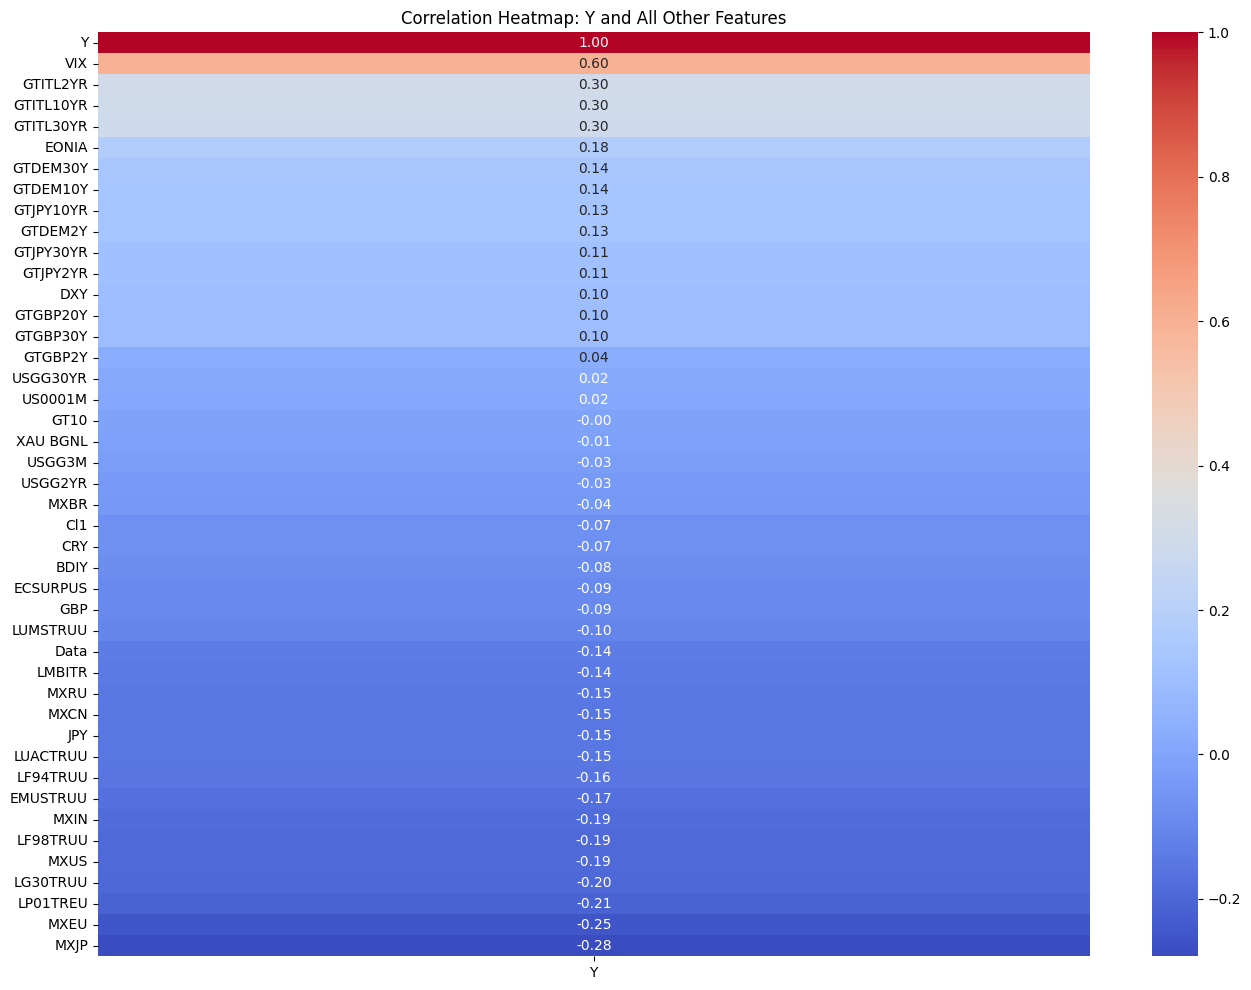

In [ ]:
# Plot 3: Correlation Heatmap of All Features with Y
# Convert date column to datetime if it exists
if 'Data' in df.columns:
    try:
        df['Data'] = pd.to_datetime(df['Data'], errors='coerce')
    except Exception as e:
        print(f"Error converting 'Data' column to datetime: {e}")

plt.figure(figsize=(16, 12))
correlation_with_Y = df.corr()[['Y']].sort_values(by='Y', ascending=False)
sns.heatmap(correlation_with_Y, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap: Y and All Other Features')
plt.show()

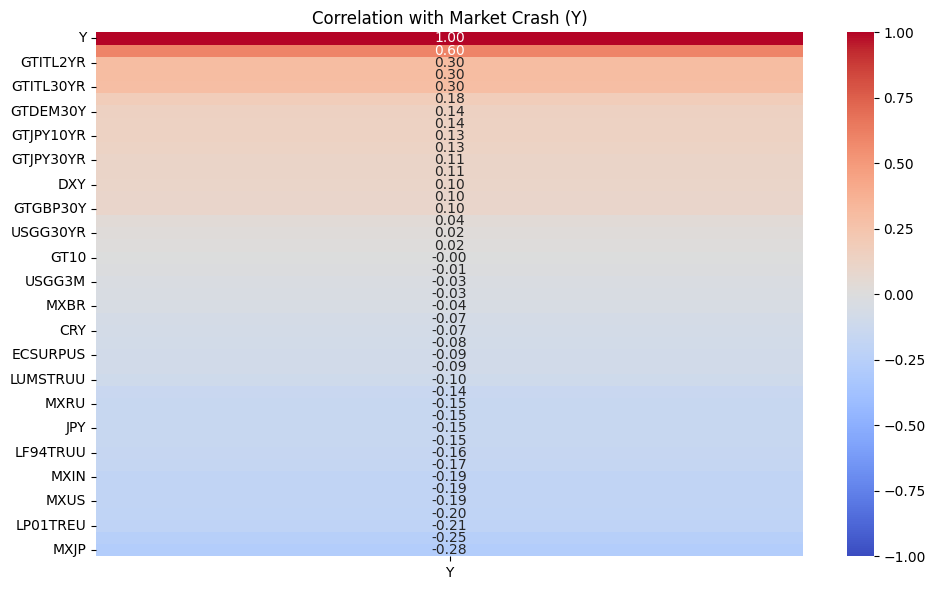

In [ ]:
# Get the correlation matrix
corr_matrix = numeric_df.corr()

correlation_with_Y = corr_matrix[['Y']].sort_values(by='Y', ascending=False)

# Heatmap for correlations with Y
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_with_Y, annot=True, cmap='coolwarm', fmt='.2f', vmin=-1, vmax=1, cbar=True, center=0)
plt.title('Correlation with Market Crash (Y)')
plt.tight_layout()
plt.show()


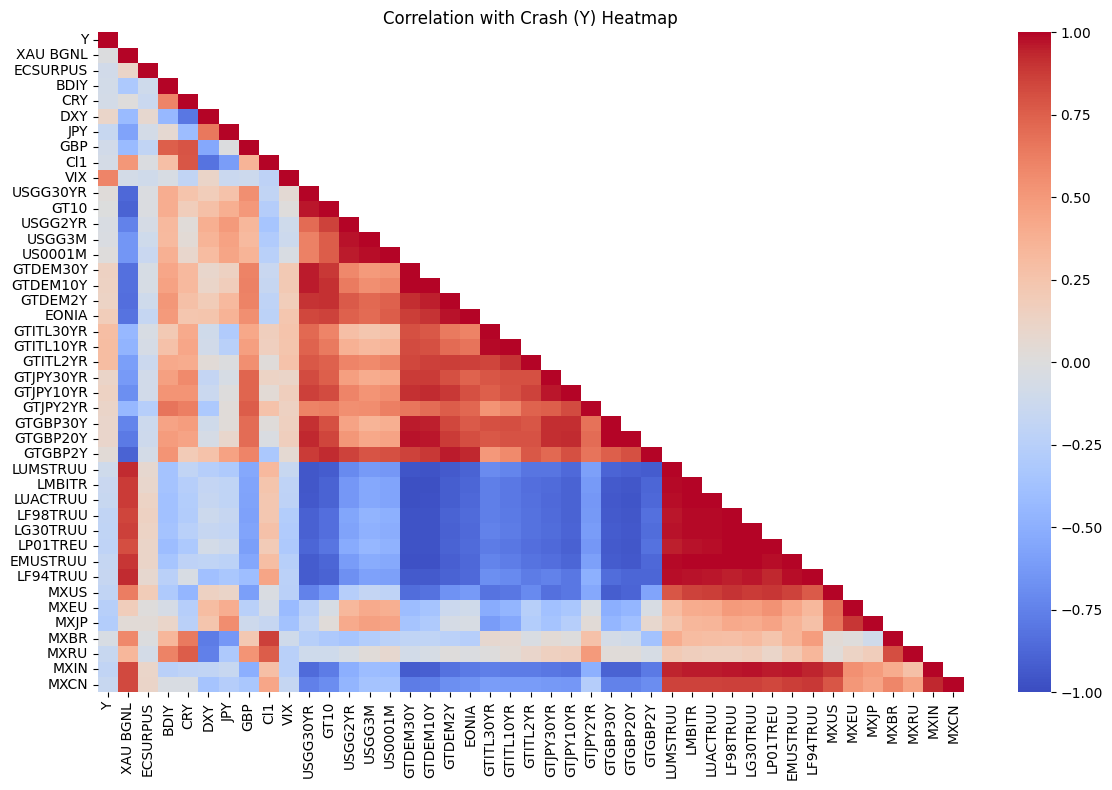

In [ ]:

# Get the correlation matrix
corr_matrix = numeric_df.corr()

# Avoid Duplicates
mask = np.triu(np.ones_like(corr_matrix), k=1)

# Set up the matplotlib fgure
plt.figure(figsize=(12, 8))

# Create heatmap using seaborn
sns.heatmap(corr_matrix,
            mask=mask,
            annot=False,
            cmap='coolwarm',
            vmin=-1,
            vmax=1,
            center=0)

plt.title('Correlation with Crash (Y) Heatmap')
plt.tight_layout()
plt.show()

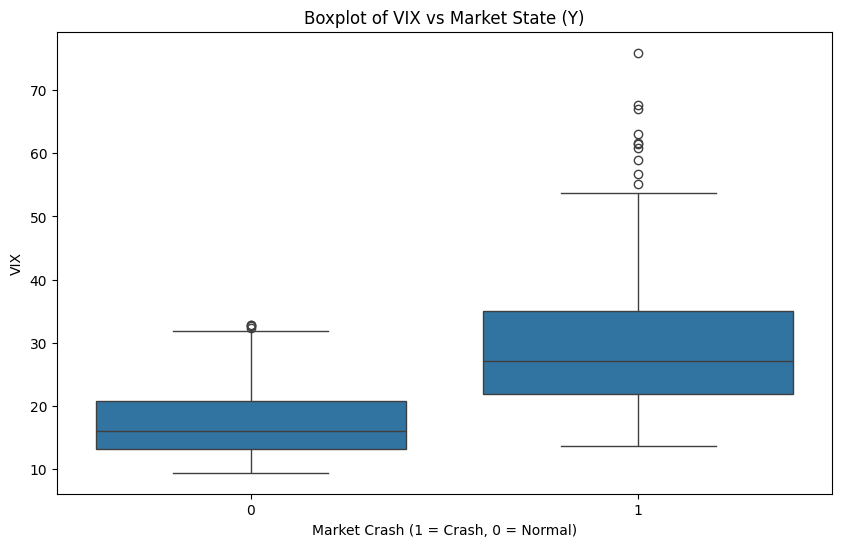

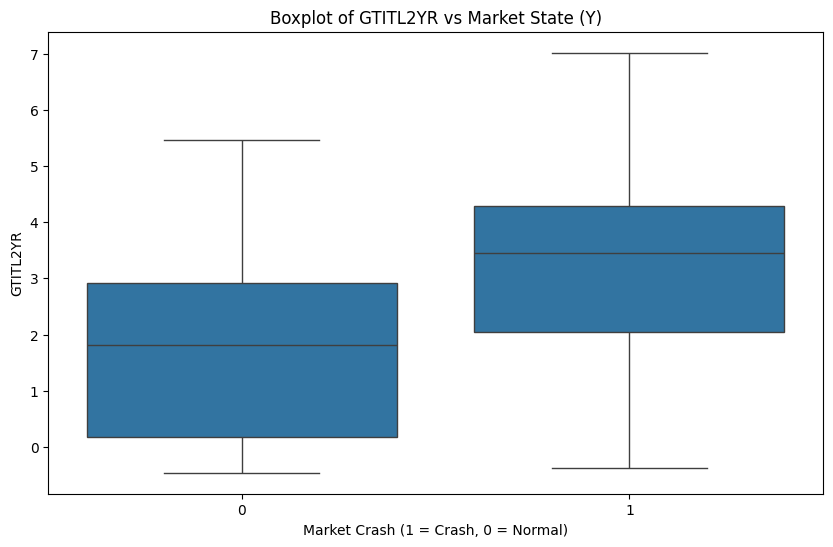

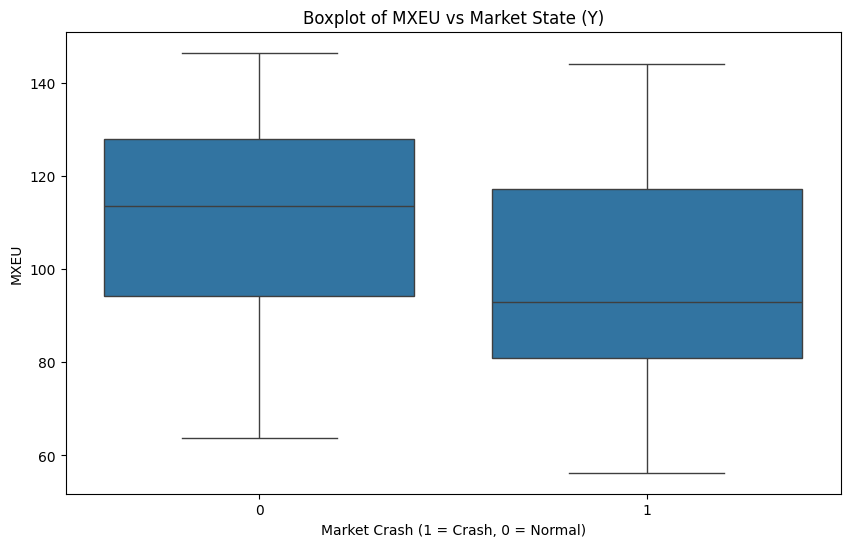

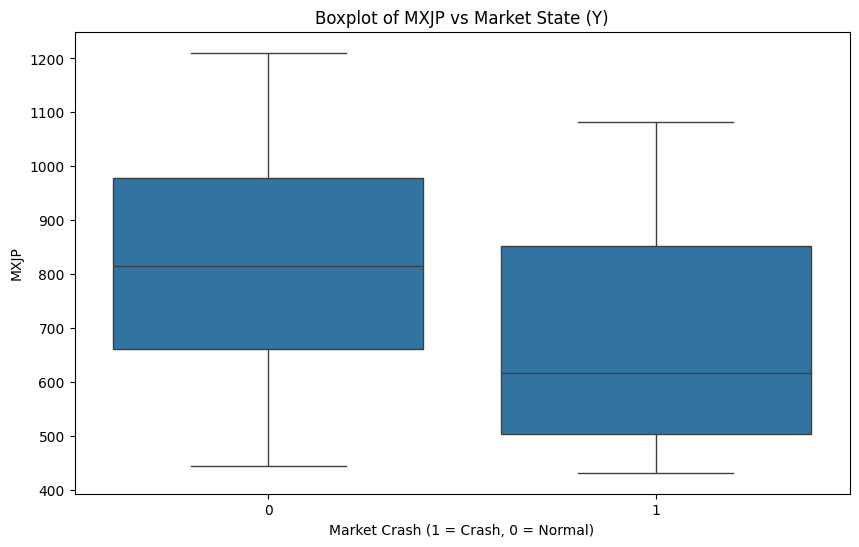

In [ ]:
# Visualize strongest positive and negative correlations with boxplots

top_positive = correlation_with_Y[1:3].index
top_negative = correlation_with_Y[-2:].index

# Boxplots for top correlations
for col in top_positive:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x='Y', y=col, data=df)
    plt.title(f'Boxplot of {col} vs Market State (Y)')
    plt.xlabel('Market Crash (1 = Crash, 0 = Normal)')
    plt.ylabel(col)
    plt.show()

for col in top_negative:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x='Y', y=col, data=df)
    plt.title(f'Boxplot of {col} vs Market State (Y)')
    plt.xlabel('Market Crash (1 = Crash, 0 = Normal)')
    plt.ylabel(col)
    plt.show()


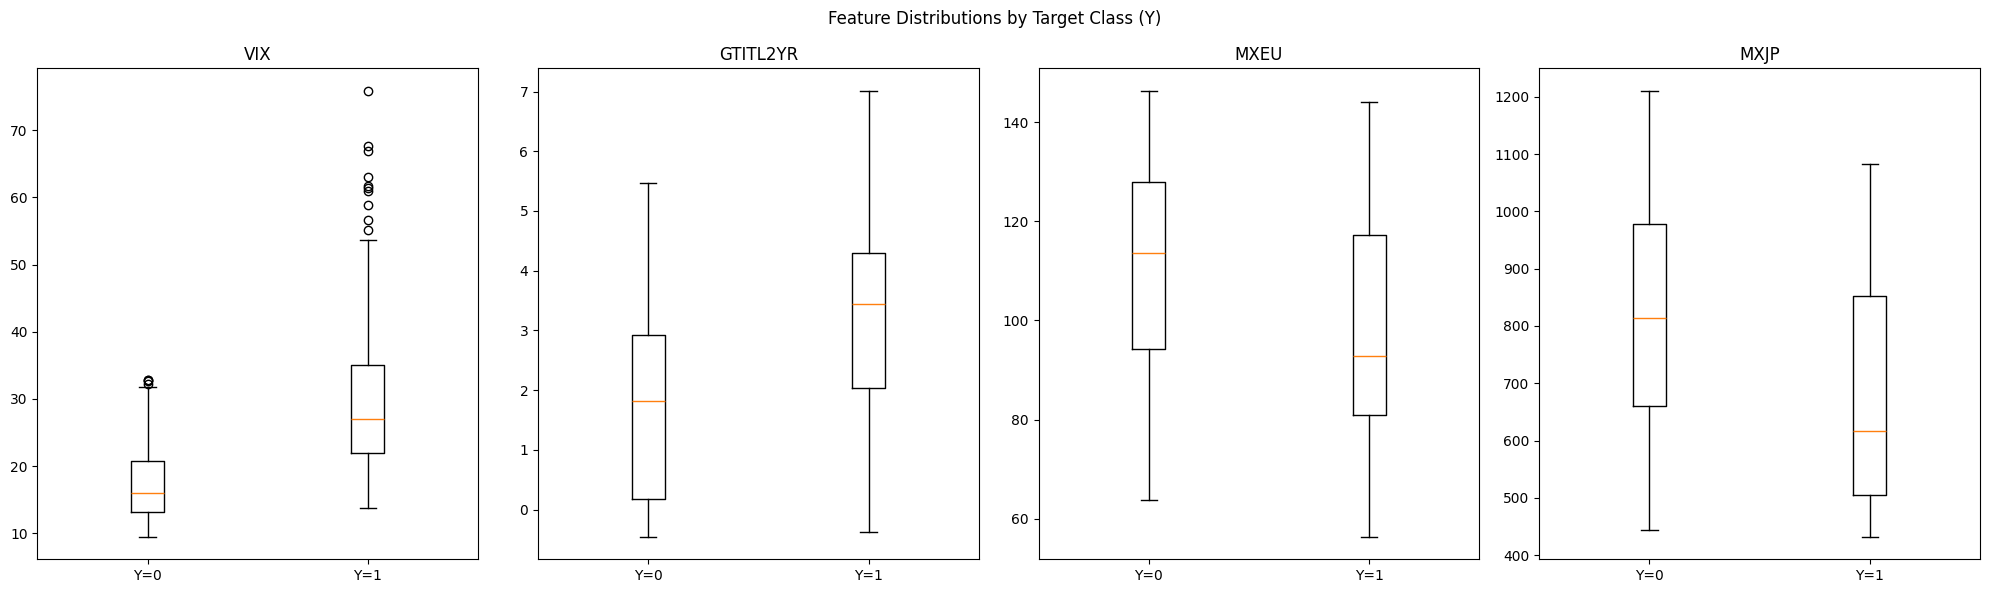

In [ ]:
 # Boxplots for a subset of interesting features and strongest correlations
cols_to_plot = list(top_positive) + list(top_negative)


fig, axes = plt.subplots(1, len(cols_to_plot), figsize=(20, 6), squeeze=False)
fig.suptitle('Feature Distributions by Target Class (Y)')

# Create boxplots
for i, col in enumerate(cols_to_plot):
    data = [df[df['Y'] == 0][col], df[df['Y'] == 1][col]]
    axes[0, i].boxplot(data, tick_labels=['Y=0', 'Y=1'])
    axes[0, i].set_title(col)
    axes[0, i].tick_params(axis='x', rotation=0)

plt.tight_layout()
plt.show()


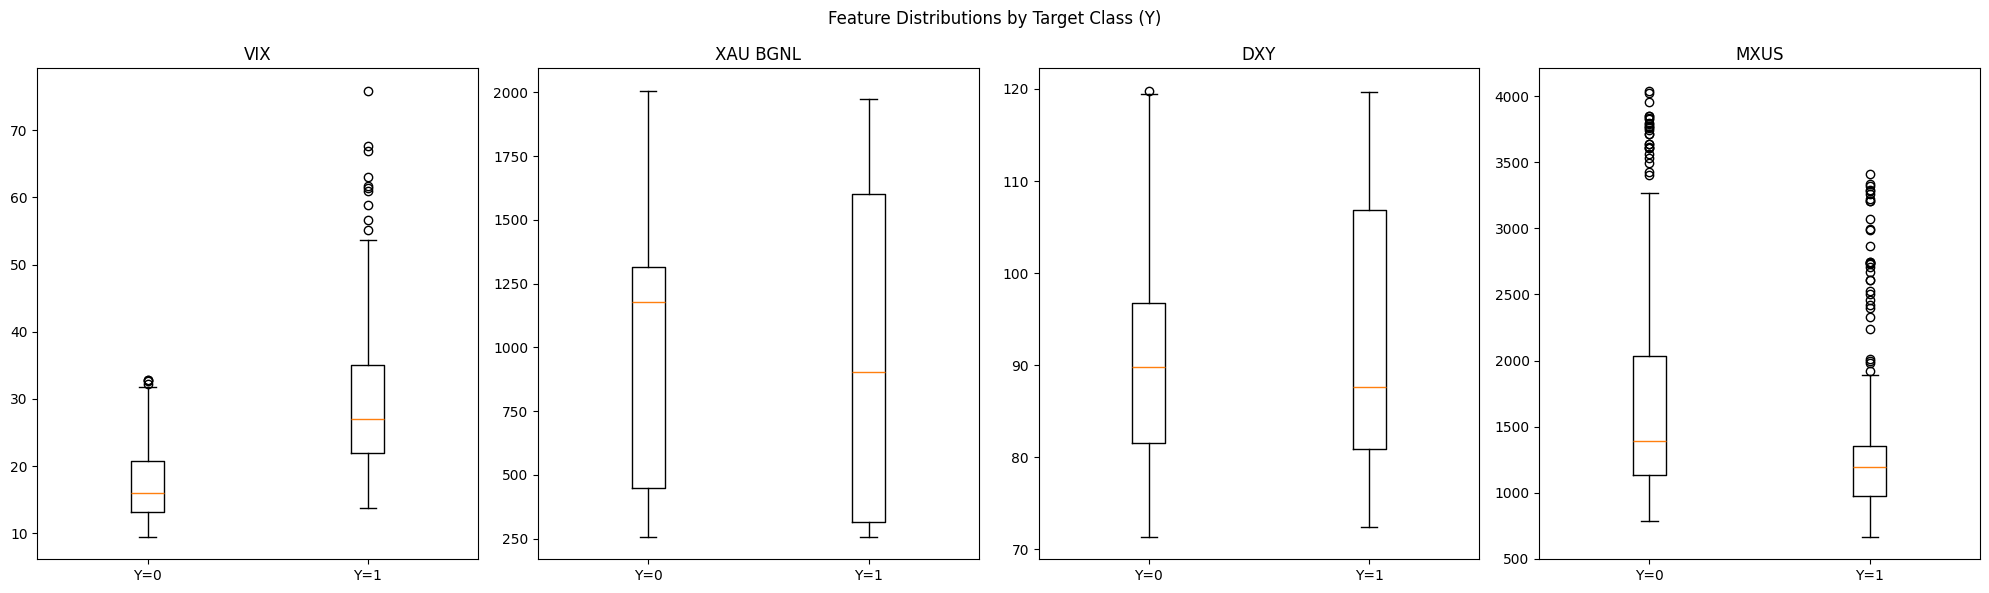

In [ ]:
# Boxplots for a subset of interesting features and strongest correlations
cols_to_plot = ["VIX", 'XAU BGNL', 'DXY', 'MXUS' ]
cols_to_plot = list(dict.fromkeys(cols_to_plot))  # Remove duplicates

fig, axes = plt.subplots(1, len(cols_to_plot), figsize=(20, 6), squeeze=False)
fig.suptitle('Feature Distributions by Target Class (Y)')

# Create boxplots
for i, col in enumerate(cols_to_plot):
    data = [df[df['Y'] == 0][col], df[df['Y'] == 1][col]]
    axes[0, i].boxplot(data, tick_labels=['Y=0', 'Y=1'])
    axes[0, i].set_title(col)
    axes[0, i].tick_params(axis='x', rotation=0)

plt.tight_layout()
plt.show()


In [ ]:
# Drop non-numeric columns and missing values for simplicity
df_cleaned = df.select_dtypes(include=[np.number]).dropna()
X = df_cleaned.drop(columns=['Y'])
y = df_cleaned['Y']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)


In [ ]:
# Logistic Regression
logistic_model = LogisticRegression(class_weight='balanced', max_iter=10000, solver='saga', random_state=42)
logistic_model.fit(X_train, y_train)
logistic_preds = logistic_model.predict(X_test)

print("Logistic Regression Report:")
print(classification_report(y_test, logistic_preds))

Logistic Regression Report:
              precision    recall  f1-score   support

           0       0.95      0.81      0.88       263
           1       0.55      0.83      0.66        71

    accuracy                           0.82       334
   macro avg       0.75      0.82      0.77       334
weighted avg       0.86      0.82      0.83       334



In [ ]:
# Random Forest Classifier
rf_model = RandomForestClassifier(class_weight='balanced', random_state=42)
rf_model.fit(X_train, y_train)
rf_preds = rf_model.predict(X_test)

print("Random Forest Report:")
print(classification_report(y_test, rf_preds))

Random Forest Report:
              precision    recall  f1-score   support

           0       0.91      0.97      0.94       263
           1       0.85      0.66      0.75        71

    accuracy                           0.90       334
   macro avg       0.88      0.82      0.84       334
weighted avg       0.90      0.90      0.90       334



In [ ]:
# Gradient Boosting Classifier
gb_model = GradientBoostingClassifier(random_state=42)
gb_model.fit(X_train, y_train)
gb_preds = gb_model.predict(X_test)

print("Gradient Boosting Report:")
print(classification_report(y_test, gb_preds))


Gradient Boosting Report:
              precision    recall  f1-score   support

           0       0.92      0.98      0.95       263
           1       0.89      0.68      0.77        71

    accuracy                           0.91       334
   macro avg       0.90      0.83      0.86       334
weighted avg       0.91      0.91      0.91       334



In [ ]:
# Support Vector Classifier (SVC)
svc_model = SVC(class_weight='balanced', random_state=42)
svc_model.fit(X_train, y_train)
svc_preds = svc_model.predict(X_test)

print("Support Vector Classifier Report:")
print(classification_report(y_test, svc_preds))

Support Vector Classifier Report:
              precision    recall  f1-score   support

           0       0.95      0.67      0.79       263
           1       0.42      0.87      0.57        71

    accuracy                           0.72       334
   macro avg       0.69      0.77      0.68       334
weighted avg       0.84      0.72      0.74       334



In [ ]:
# Unsupervised Isolation Forest
isolation_model = IsolationForest(contamination=0.01, random_state=42)
isolation_model.fit(X_train)
isolation_preds = isolation_model.predict(X_test)

# Map results to labels
isolation_preds = [1 if p == -1 else 0 for p in isolation_preds]

print("Isolation Forest Report:")
print(classification_report(y_test, isolation_preds))

Isolation Forest Report:
              precision    recall  f1-score   support

           0       0.79      0.99      0.88       263
           1       0.00      0.00      0.00        71

    accuracy                           0.78       334
   macro avg       0.39      0.49      0.44       334
weighted avg       0.62      0.78      0.69       334



In [ ]:
# Evaluate and compare model performances
def evaluate_model(name, y_test, y_preds):
    accuracy = accuracy_score(y_test, y_preds)
    precision = precision_score(y_test, y_preds, zero_division=0)
    recall = recall_score(y_test, y_preds, zero_division=0)
    f1 = f1_score(y_test, y_preds, zero_division=0)
    print(f"{name} Performance:")
    print(f"Accuracy: {accuracy:.2f}, Precision: {precision:.2f}, Recall: {recall:.2f}, F1-Score: {f1:.2f}\n")

# Compare model performances
evaluate_model("Logistic Regression", y_test, logistic_preds)
evaluate_model("Random Forest", y_test, rf_preds)
evaluate_model("Gradient Boosting", y_test, gb_preds)
evaluate_model("Support Vector Classifier", y_test, svc_preds)
evaluate_model("Isolation Forest", y_test, isolation_preds)

Logistic Regression Performance:
Accuracy: 0.82, Precision: 0.55, Recall: 0.83, F1-Score: 0.66

Random Forest Performance:
Accuracy: 0.90, Precision: 0.85, Recall: 0.66, F1-Score: 0.75

Gradient Boosting Performance:
Accuracy: 0.91, Precision: 0.89, Recall: 0.68, F1-Score: 0.77

Support Vector Classifier Performance:
Accuracy: 0.72, Precision: 0.42, Recall: 0.87, F1-Score: 0.57

Isolation Forest Performance:
Accuracy: 0.78, Precision: 0.00, Recall: 0.00, F1-Score: 0.00



In [ ]:
from sklearn.metrics import classification_report

# Example for Logistic Regression
print("Logistic Regression Report:")
print(classification_report(y_test, logistic_preds))

# Similarly for other models
print("Random Forest Report:")
print(classification_report(y_test, rf_preds))

print("Gradient Boosting Report:")
print(classification_report(y_test, gb_preds))

print("Support Vector Classifier Report:")
print(classification_report(y_test, svc_preds))

print("Isolation Forest Report:")
print(classification_report(y_test, isolation_preds))


Logistic Regression Report:
              precision    recall  f1-score   support

           0       0.95      0.81      0.88       263
           1       0.55      0.83      0.66        71

    accuracy                           0.82       334
   macro avg       0.75      0.82      0.77       334
weighted avg       0.86      0.82      0.83       334

Random Forest Report:
              precision    recall  f1-score   support

           0       0.91      0.97      0.94       263
           1       0.85      0.66      0.75        71

    accuracy                           0.90       334
   macro avg       0.88      0.82      0.84       334
weighted avg       0.90      0.90      0.90       334

Gradient Boosting Report:
              precision    recall  f1-score   support

           0       0.92      0.98      0.95       263
           1       0.89      0.68      0.77        71

    accuracy                           0.91       334
   macro avg       0.90      0.83      0.86       33